<a href="https://colab.research.google.com/github/nsubbaian/FrequentistML/blob/master/Project2/FML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequentist Machine Learning Assigment 2: Logistic Regression** 
##### Implement logistic regression with stochastic gradient descent as the optimization algorithm.


In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

# Grab a binary classification dataset from UCI or other repository.
# Selected Dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
# Dataset Description: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names 

# The class label is the last column in the dataset, (2 for benign, 4 for malignant)
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', 
                      names=["ID", "ClumpThickness", "Uniformity_CellSize", "Uniformity_CellShape", "MarginalAdhesion",
                             "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", 
                             "Mitosis", "Class"])
# Removed ID number
dataset = dataset.drop(columns = {'ID'})

# Drop rows with '?' in them ( missing data)
from functools import partial
dataset = dataset.apply(partial(pd.to_numeric, errors='coerce'))
dataset = dataset.dropna(axis = 0)

#add intercept column
dataset['intercept'] = 1
intercept = dataset['intercept']
dataset.drop(labels=['intercept'], axis=1,inplace = True)
dataset.insert(0, 'intercept', intercept)

# All features are on a scale of 1-10
# Change labels to have 0 for benign and 1 for malignant
dataset['Class'].replace(2, 0, inplace = True)
dataset['Class'].replace(4, 1, inplace = True)

# Divide your data into roughly 80% train, 10% validation, 10% test. 
training, validation, test = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])
print("Length of dataset:", len(dataset))
print( "Length of training:", len(training))
print("Length of validation:", len(validation))
print("Length of test:", len(test))

train_X, train_Y = training.iloc[:, :-1], training.iloc[:, 10]
val_X, val_Y = validation.iloc[:, :-1], validation.iloc[:, 10]
test_X, test_Y = test.iloc[:, :-1], test.iloc[:,10]

display(training)

Length of dataset: 683
Length of training: 546
Length of validation: 68
Length of test: 69


,intercept,ClumpThickness,Uniformity_CellSize,Uniformity_CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitosis,Class
100,1,10,3,5,1,10,5.0,3,10,2,1
692,1,3,1,1,1,2,1.0,1,1,1,0
584,1,5,1,1,6,3,1.0,1,1,1,0
150,1,1,1,1,1,1,1.0,3,1,1,0
205,1,5,10,10,9,6,10.0,7,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
135,1,5,1,1,1,2,2.0,3,3,1,0
578,1,1,1,1,1,2,1.0,2,1,1,0
372,1,4,1,2,1,2,1.0,2,1,1,0
422,1,4,3,3,1,2,1.0,3,3,1,0


In [291]:
def sigmoid_decision(thetaJ, x):
  # had to do x.dot(theta.T) instead of theta.t.dot(x) as said in the notes
  result = 1/ (1 + np.exp(-(x.dot(thetaJ.T))))
  return (result>.5 )

def SGD(thetaJ, alpha, Y_val, h, XJ_val):
  return (thetaJ + (alpha*(Y_val - h)).dot(XJ_val))

def loglikelihood(y, h):
  return ((y*np.log(h+1) + (1-np.array(y))*np.log(1-h+1)).sum())


def logisticRegression(alpha, lam):

  # initialization
  thetaJ = np.ones(len(train_X.columns))

  for i in range(len(dataset)):
    hypothesis = sigmoid_decision(thetaJ, train_X)

    # make lam = 0, for unregularized version
    thetaJ = SGD(thetaJ, alpha, train_Y, hypothesis, train_X)  - 2* lam * thetaJ
    
    if (lam >0):
      loglikelihood_Reg.append(loglikelihood(train_Y, hypothesis))
    else:
      loglikelihood_NoReg.append(loglikelihood(train_Y, hypothesis))
  return (thetaJ)

### A. Implement SGD without regularization and report your % correct on the test dataset.


In [292]:
loglikelihood_NoReg = []

# find best alpha value using validation set
bestaccuracy = float('inf')
bestalpha = 0
for alpha in [.01, .001, .0001, 1, 1.2, 5, 10]:
  val_accuracy = (val_Y == sigmoid_decision(logisticRegression(alpha, 0), val_X)).mean()
  bestalpha = alpha if val_accuracy < bestaccuracy else bestalpha
  bestaccuracy = val_accuracy if val_accuracy < bestaccuracy else bestaccuracy
print("best alpha value:", bestalpha)

test_accuracy = (test_Y == sigmoid_decision(logisticRegression(bestalpha, 0), test_X)).mean()
print("Accuracy on Test Set:", test_accuracy)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


best alpha value: 0.001
Accuracy on Test Set: 0.9710144927536232


### B. Implement SGD with regularization, select the best lambda parameter using the validation dataset, and report your % correct on the test dataset.

In [293]:
loglikelihood_Reg = []

# find best lambda value using validation set
bestaccuracy = float('inf')
bestlam = 0
for lam in [0, .1, .01, .001, .0001, 1, 1.2, 5, 10]:
  val_accuracy = (val_Y == sigmoid_decision(logisticRegression(bestalpha, lam), val_X)).mean()
  bestlam = lam if val_accuracy < bestaccuracy else bestlam
  bestaccuracy = val_accuracy if val_accuracy < bestaccuracy else bestaccuracy
print("best lambda value:", bestlam)

test_accuracy = (test_Y == sigmoid_decision(logisticRegression(bestalpha, bestlam), test_X)).mean()
print("Accuracy on Test Set:", test_accuracy)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


best lambda value: 1
Accuracy on Test Set: 0.6376811594202898


### Plot the likelihood function with respect to iterations for unregularized and regularized on one set of axes.

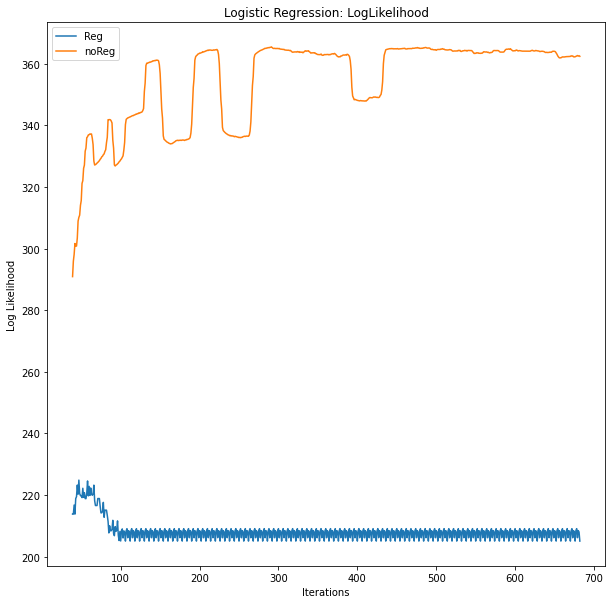

In [296]:
# Plot regularized and un-regularized likelihood

fig, ax = plt.subplots(figsize=[10,10])
N = 40
ax.plot(range(len(dataset)), pd.Series(loglikelihood_Reg[0:len(dataset)]).rolling(window=N).mean(), label = 'Reg')
ax.plot(range(len(dataset)),pd.Series(loglikelihood_NoReg[0:len(dataset)]).rolling(window=N).mean() , label = 'noReg')

plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.title('Logistic Regression: LogLikelihood')
plt.legend()
plt.show()

In the plot the regularized curve appears below the unregularized curve for the most part. This makes sense as the regularized curve is the "penalized" version. There is however, a lot of noise in the plot, this may be a result of the data or something interesting with the logs in the loglikelihood funcion. I used a moving average to get rid of some of that noise for the sake of the plot.
